In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from topsis import Topsis


# Football Graph

In [90]:
Graph = nx.read_edgelist('DataFoot/football.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(Graph))

Graph with 24 nodes and 30 edges


C:\Users\DELL\AppData\Local\Temp\ipykernel_11920\1033858215.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(Graph))


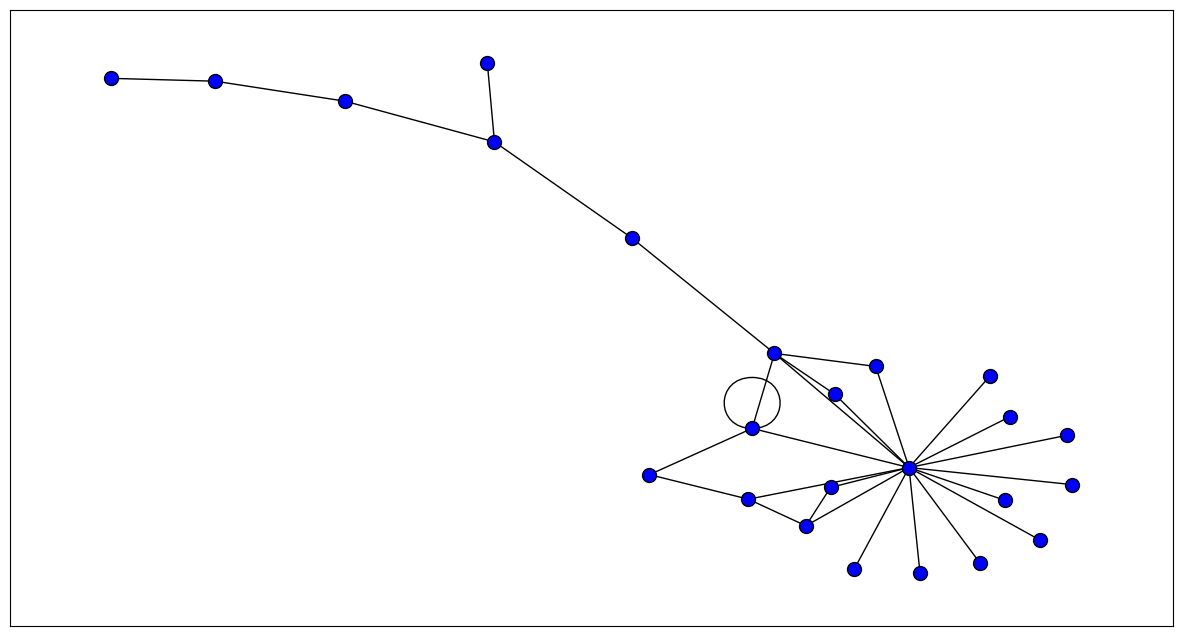

In [91]:
sp = nx.spring_layout(Graph)
plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw_networkx(Graph,pos=sp,node_color='blue',with_labels=False,edgecolors='black',node_size=100)
plt.show()

# Centrality measures

In [92]:
print(nx.degree_centrality(Graph))

{35: 0.21739130434782608, 7: 0.043478260869565216, 1: 0.13043478260869565, 9: 0.08695652173913043, 8: 0.08695652173913043, 2: 0.21739130434782608, 16: 0.08695652173913043, 24: 0.13043478260869565, 3: 0.13043478260869565, 29: 0.08695652173913043, 5: 0.08695652173913043, 28: 0.043478260869565216, 6: 0.08695652173913043, 10: 0.6956521739130435, 4: 0.043478260869565216, 11: 0.043478260869565216, 17: 0.043478260869565216, 22: 0.043478260869565216, 25: 0.043478260869565216, 26: 0.043478260869565216, 31: 0.043478260869565216, 33: 0.043478260869565216, 34: 0.043478260869565216, 12: 0.08695652173913043}


In [93]:
print(nx.betweenness_centrality(Graph))

{35: 0.054018445322793145, 7: 0.0, 1: 0.31225296442687744, 9: 0.1660079051383399, 8: 0.0, 2: 0.411725955204216, 16: 0.0, 24: 0.02898550724637681, 3: 0.003293807641633728, 29: 0.0, 5: 0.08695652173913043, 28: 0.0, 6: 0.001976284584980237, 10: 0.7727272727272727, 4: 0.0, 11: 0.0, 17: 0.0, 22: 0.0, 25: 0.0, 26: 0.0, 31: 0.0, 33: 0.0, 34: 0.0, 12: 0.3557312252964427}


In [94]:
print(nx.closeness_centrality(Graph))

{35: 0.41818181818181815, 7: 0.23958333333333334, 1: 0.3108108108108108, 9: 0.25, 8: 0.40350877192982454, 2: 0.4791666666666667, 16: 0.40350877192982454, 24: 0.3770491803278688, 3: 0.3770491803278688, 29: 0.36507936507936506, 5: 0.20535714285714285, 28: 0.17164179104477612, 6: 0.3108108108108108, 10: 0.5476190476190477, 4: 0.359375, 11: 0.359375, 17: 0.359375, 22: 0.359375, 25: 0.359375, 26: 0.359375, 31: 0.359375, 33: 0.359375, 34: 0.359375, 12: 0.38333333333333336}


In [95]:
print(nx.eigenvector_centrality(Graph))

{35: 0.2966075694540756, 7: 0.003819645826644164, 1: 0.01744350060719116, 9: 0.004022646518991979, 8: 0.20722078508996042, 2: 0.3106165051128142, 16: 0.20722078508996042, 24: 0.21343118568331598, 3: 0.22731827888667572, 29: 0.18898316780498667, 5: 0.0009257730930546706, 28: 0.00020300069234962812, 6: 0.11166679215091552, 10: 0.6358679587480408, 4: 0.13921483191845066, 11: 0.13921483191845066, 17: 0.13921483191845066, 22: 0.13921483191845066, 25: 0.13921483191845066, 26: 0.13921483191845066, 31: 0.13921483191845066, 33: 0.13921483191845066, 34: 0.13921483191845066, 12: 0.0718255989981539}


# Build the Evaluation Matrix

In [96]:
    betCent = nx.betweenness_centrality(Graph)
    closCent = nx.closeness_centrality(Graph)
    degCent = nx.degree_centrality(Graph)
    eigCent = nx.eigenvector_centrality(Graph)


    BC = []
    DC = []
    EC = []
    CC = []
    Node = []

    for i in sorted(betCent):
        BC.append(betCent[i])
        Node.append(i)

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

   
    Matrix = pd.DataFrame({'Node' : Node,
                        'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})
    Matrix

,Node,DC,CC,BC,EC
0,1,0.130435,0.310811,0.312253,0.017444
1,2,0.217391,0.479167,0.411726,0.310617
2,3,0.130435,0.377049,0.003294,0.227318
3,4,0.043478,0.359375,0.000000,0.139215
4,5,0.086957,0.205357,0.086957,0.000926
5,6,0.086957,0.310811,0.001976,0.111667
6,7,0.043478,0.239583,0.000000,0.003820
7,8,0.086957,0.403509,0.000000,0.207221
8,9,0.086957,0.250000,0.166008,0.004023
9,10,0.695652,0.547619,0.772727,0.635868


In [97]:
# Save the Matrix as a csv file
Matrix.to_csv("DataFoot/Matrix.csv", index=False)

In [98]:
# Convert Matrix to numpy array
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[1.30434783e-01, 3.12252964e-01, 3.10810811e-01, 1.74435006e-02],
       [2.17391304e-01, 4.11725955e-01, 4.79166667e-01, 3.10616505e-01],
       [1.30434783e-01, 3.29380764e-03, 3.77049180e-01, 2.27318279e-01],
       [4.34782609e-02, 0.00000000e+00, 3.59375000e-01, 1.39214832e-01],
       [8.69565217e-02, 8.69565217e-02, 2.05357143e-01, 9.25773093e-04],
       [8.69565217e-02, 1.97628458e-03, 3.10810811e-01, 1.11666792e-01],
       [4.34782609e-02, 0.00000000e+00, 2.39583333e-01, 3.81964583e-03],
       [8.69565217e-02, 0.00000000e+00, 4.03508772e-01, 2.07220785e-01],
       [8.69565217e-02, 1.66007905e-01, 2.50000000e-01, 4.02264652e-03],
       [6.95652174e-01, 7.72727273e-01, 5.47619048e-01, 6.35867959e-01],
       [4.34782609e-02, 0.00000000e+00, 3.59375000e-01, 1.39214832e-01],
       [8.69565217e-02, 3.55731225e-01, 3.83333333e-01, 7.18255990e-02],
       [8.69565217e-02, 0.00000000e+00, 4.03508772e-01, 2.07220785e-01],
       [4.34782609e-02, 0.00000000e+00, 3.59375000e

# Call Topsis class 

In [99]:
# Decision Matrix
Evaluation_matrix = Matrix_arr

In [100]:
weights = [0.2, 0.3 , 0.3, 0.2]

criteria = np.array([True,True,True,True])

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[1.30434783e-01 3.12252964e-01 3.10810811e-01 1.74435006e-02]
 [2.17391304e-01 4.11725955e-01 4.79166667e-01 3.10616505e-01]
 [1.30434783e-01 3.29380764e-03 3.77049180e-01 2.27318279e-01]
 [4.34782609e-02 0.00000000e+00 3.59375000e-01 1.39214832e-01]
 [8.69565217e-02 8.69565217e-02 2.05357143e-01 9.25773093e-04]
 [8.69565217e-02 1.97628458e-03 3.10810811e-01 1.11666792e-01]
 [4.34782609e-02 0.00000000e+00 2.39583333e-01 3.81964583e-03]
 [8.69565217e-02 0.00000000e+00 4.03508772e-01 2.07220785e-01]
 [8.69565217e-02 1.66007905e-01 2.50000000e-01 4.02264652e-03]
 [6.95652174e-01 7.72727273e-01 5.47619048e-01 6.35867959e-01]
 [4.34782609e-02 0.00000000e+00 3.59375000e-01 1.39214832e-01]
 [8.69565217e-02 3.55731225e-01 3.83333333e-01 7.18255990e-02]
 [8.69565217e-02 0.00000000e+00 4.03508772e-01 2.07220785e-01]
 [4.34782609e-02 0.00000000e+00 3.59375000e-01 1.39214832e-01]
 [4.34782609e-02 0.00000000e+00 3.59375000e-01 1.39214832e-01]
 [1.30434783e-01 2.89855072e-02 3.77049180e-01 

# Determin S+ and S-

In [101]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.23154217 0.16961335 0.27827047 0.29541789 0.28577453 0.29257999
 0.30836285 0.28498458 0.26788113 0.         0.29541789 0.22310203
 0.28498458 0.29541789 0.29541789 0.27294264 0.29541789 0.29541789
 0.31080921 0.28673075 0.29541789 0.29541789 0.29541789 0.25149243]
worst_distance	 [0.09757059 0.15199488 0.06085231 0.04222098 0.02830369 0.03405403
 0.01152219 0.05798213 0.05189467 0.31080921 0.04222098 0.11250988
 0.05798213 0.04222098 0.04222098 0.05942133 0.04222098 0.04222098
 0.         0.05103894 0.04222098 0.04222098 0.04222098 0.08503515]


In [102]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [0.29646554 0.4726088  0.17944034 0.12504774 0.09011669 0.10425746
 0.03601977 0.16906052 0.16228456 1.         0.12504774 0.33523804
 0.16906052 0.12504774 0.12504774 0.17878391 0.12504774 0.12504774
 0.         0.15110574 0.12504774 0.12504774 0.12504774 0.25268404]
rank_to_worst_similarity	 [19, 7, 5, 6, 21, 22, 18, 4, 17, 15, 11, 23, 14, 20, 9, 8, 13, 16, 3, 24, 1, 12, 2, 10]


In [103]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.70353446 0.5273912  0.82055966 0.87495226 0.90988331 0.89574254
 0.96398023 0.83093948 0.83771544 0.         0.87495226 0.66476196
 0.83093948 0.87495226 0.87495226 0.82121609 0.87495226 0.87495226
 1.         0.84889426 0.87495226 0.87495226 0.87495226 0.74731596]
rank_to_best_similarity	 [10, 2, 12, 1, 24, 3, 16, 8, 13, 9, 20, 22, 21, 18, 17, 14, 4, 23, 11, 15, 6, 5, 7, 19]


In [104]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

#print(type(Best_Dist))
#print(len(Best_Dist))

# Calculate Closness 

In [105]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [106]:
Closnness
#print(len(Closnness))

array([0.29646554, 0.4726088 , 0.17944034, 0.12504774, 0.09011669,
       0.10425746, 0.03601977, 0.16906052, 0.16228456, 1.        ,
       0.12504774, 0.33523804, 0.16906052, 0.12504774, 0.12504774,
       0.17878391, 0.12504774, 0.12504774, 0.        , 0.15110574,
       0.12504774, 0.12504774, 0.12504774, 0.25268404])

In [107]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])

In [108]:
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.231542,0.097571,0.296466
1,0.169613,0.151995,0.472609
2,0.278270,0.060852,0.179440
3,0.295418,0.042221,0.125048
4,0.285775,0.028304,0.090117
5,0.292580,0.034054,0.104257
6,0.308363,0.011522,0.036020
7,0.284985,0.057982,0.169061
8,0.267881,0.051895,0.162285
9,0.000000,0.310809,1.000000


In [109]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("DataFoot/Out.csv",index=False)

In [110]:
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]

In [111]:
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C

[9,
 1,
 11,
 0,
 23,
 2,
 15,
 12,
 7,
 8,
 19,
 13,
 22,
 10,
 14,
 16,
 3,
 17,
 21,
 20,
 5,
 4,
 6,
 18]

In [112]:
#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

[10,
 2,
 12,
 1,
 35,
 3,
 24,
 16,
 8,
 9,
 29,
 17,
 34,
 11,
 22,
 25,
 4,
 26,
 33,
 31,
 6,
 5,
 7,
 28]

In [113]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("DataFoot/Topsis.csv",index=False)

# The nodes depending on the relative closeness to the ideal solution

In [114]:
Final_Tab = pd.concat([pd.read_csv("DataFoot/Out.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.000000,0.310809,1.000000,10
1,0.169613,0.151995,0.472609,2
2,0.223102,0.112510,0.335238,12
3,0.231542,0.097571,0.296466,1
4,0.251492,0.085035,0.252684,35
5,0.278270,0.060852,0.179440,3
6,0.272943,0.059421,0.178784,24
7,0.284985,0.057982,0.169061,16
8,0.284985,0.057982,0.169061,8
9,0.267881,0.051895,0.162285,9


In [115]:
res = pd.concat([pd.read_csv("DataFoot/Matrix.csv"),pd.read_csv("DataFoot/Out.csv")],axis=1)
res

,Node,DC,CC,BC,EC,S+,S-,C
0,1,0.130435,0.310811,0.312253,0.017444,0.000000,0.310809,1.000000
1,2,0.217391,0.479167,0.411726,0.310617,0.169613,0.151995,0.472609
2,3,0.130435,0.377049,0.003294,0.227318,0.223102,0.112510,0.335238
3,4,0.043478,0.359375,0.000000,0.139215,0.231542,0.097571,0.296466
4,5,0.086957,0.205357,0.086957,0.000926,0.251492,0.085035,0.252684
5,6,0.086957,0.310811,0.001976,0.111667,0.278270,0.060852,0.179440
6,7,0.043478,0.239583,0.000000,0.003820,0.272943,0.059421,0.178784
7,8,0.086957,0.403509,0.000000,0.207221,0.284985,0.057982,0.169061
8,9,0.086957,0.250000,0.166008,0.004023,0.284985,0.057982,0.169061
9,10,0.695652,0.547619,0.772727,0.635868,0.267881,0.051895,0.162285


In [116]:
# Save the res as a csv file
res.to_csv("DataFoot/res.csv", index=False)

# User

In [117]:
K = int(input("Enter the number of the top influential nodes:"))

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

Enter the number of the top influential nodes:10
The 1 top influential node is  10
The 2 top influential node is  2
The 3 top influential node is  12
The 4 top influential node is  1
The 5 top influential node is  35
The 6 top influential node is  3
The 7 top influential node is  24
The 8 top influential node is  16
The 9 top influential node is  8
The 10 top influential node is  9
